In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('gapminder.csv')

In [3]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [4]:
y = df['fertility']

In [5]:
x = df.drop('fertility',axis = 1)

1> extact feater<br/>
a> feature should have numeric value<br/>
b> feature should have some row and column<br/>
c> feature should not be any null value<br/>
d> feature should in array / DATAFRAME<br/>
2> split the datasets into traing and testing data sets.<br/>
e> feature should be on the same scle<br/>
3> train the model on the traning datasets<br/>
4> test the model on the testing datasets.<br/>

# 1

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   HIV              139 non-null    float64
 2   CO2              139 non-null    float64
 3   BMI_male         139 non-null    float64
 4   GDP              139 non-null    float64
 5   BMI_female       139 non-null    float64
 6   life             139 non-null    float64
 7   child_mortality  139 non-null    float64
 8   Region           139 non-null    object 
dtypes: float64(8), object(1)
memory usage: 9.9+ KB


In [7]:
 x = pd.get_dummies(x,columns=['Region'],drop_first = True)

In [8]:
x .head()

,population,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   population                         139 non-null    float64
 1   HIV                                139 non-null    float64
 2   CO2                                139 non-null    float64
 3   BMI_male                           139 non-null    float64
 4   GDP                                139 non-null    float64
 5   BMI_female                         139 non-null    float64
 6   life                               139 non-null    float64
 7   child_mortality                    139 non-null    float64
 8   Region_East Asia & Pacific         139 non-null    uint8  
 9   Region_Europe & Central Asia       139 non-null    uint8  
 10  Region_Middle East & North Africa  139 non-null    uint8  
 11  Region_South Asia                  139 non-null    uint8  

In [10]:
x.shape

(139, 13)

In [11]:
x.isnull().sum()

population                           0
HIV                                  0
CO2                                  0
BMI_male                             0
GDP                                  0
BMI_female                           0
life                                 0
child_mortality                      0
Region_East Asia & Pacific           0
Region_Europe & Central Asia         0
Region_Middle East & North Africa    0
Region_South Asia                    0
Region_Sub-Saharan Africa            0
dtype: int64

In [12]:
type(x)

pandas.core.frame.DataFrame

# 2

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state = 42)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
x_train = scaler.fit_transform(x_train)

In [18]:
x_test = scaler.transform(x_test)

# 3

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 4

In [22]:
model.score(x_test,y_test)

0.8803264689704071

# prediction

In [23]:
data = pd.read_csv('gapminderfeature.csv')

In [24]:
data

,0,2,3,4,5,6,7,8,9,10,11,12,13
0,34811059,0.1,3.328945,24.5962,12314,129.9049,75.3,29.5,0,1,0,0,0


In [25]:
data = scaler.transform(data)

In [27]:
model1 = model.predict(data)

In [28]:
model1

array([1.98776127])

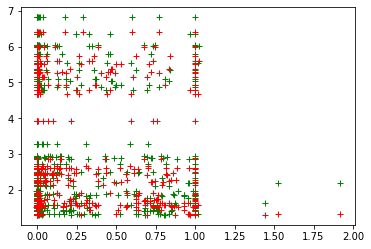